# Astrometric covariances for Kolmogorov turbulence
What do numerics look like for spectra coming from index fluctuations with Kolmogorov spectrum, $P_\phi(k) \propto k^{-11/3}$?  We'll work under the assumption of isotropic turbulence that is frozen and wind-blown across the field, as described in notes.  The correlation function for displacement ${\bf u}=(u,v)$ as a function of sky displacement ${\bf r}$ (equal to $(r,\theta)$ in polar coords) is, for an isotropic field,

$$ {\bf C}_{\bf u}  = \left( 
\begin{array}{cc}
I_0 - I_2 \cos 2\theta & -I_2 \sin 2\theta \\
-I_2 \sin 2\theta & I_0 + I_2 \cos 2\theta
\end{array} \right)
$$
with
$$ I_n \equiv \int k\,dk\, k^2 P_\phi(k) J_n(kr) $$

For pure Kolmogorov, it's clear that $I_n\propto r^{-1/3}$, but the outer scale probably matters here.  Literature suggests outer scales of 1-100m.  At altitude of 10km, this would subtend 0.3-30 arcmin, and our correlations extend well past 10-20 arcmin.

So we will investigate the von Karman spectrum
$$ P_\phi(k) \propto \left(k^2 + k_0^2\right)^{11/6}, \qquad k_0\equiv 2\pi/r_0.
$$

Also important are the convolution of the deflection field with the telescope aperture, since the telescope diameter at the distance of the turbulence layer is perhaps an arcminute.  This adds an additional factor to the index power spectrum, if $R$ is the telescope diameter:
$$ P_\phi(k) \times= \left(\frac{J_1(kR)}{kR}\right)^2.
$$

Finally we must consider the smearing of the deflection pattern by the wind blowing across the field during the exposure.  This will convolve the deflection field with a line segment along the wind vector.  This could be done via an FFT with an additional sinc$^2$ term, but I'll implement this as a correlation-function convolution with a triangular window.  

In [1]:
import numpy as np
from matplotlib import pyplot as pl
from vonkarman import TurbulentLayer, plotCuv, plotCuts, markScales
%matplotlib inline

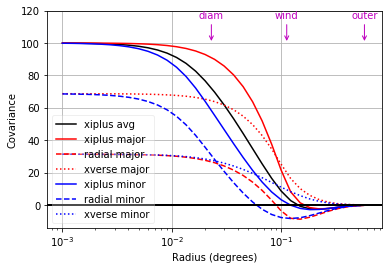

In [4]:
# Less wind
ttt.setWind((-0.1,0.05))
plotCuts(ttt,0.001,0.5)
markScales(ttt)

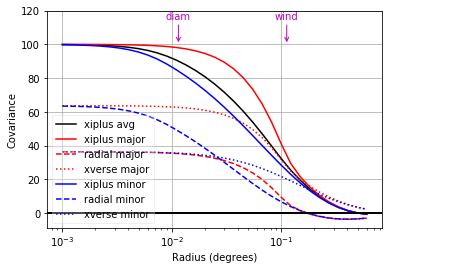

In [6]:
# Bigger outer scale
ttt.setScales(4*2*np.pi/np.sqrt(ttt.k0sq),ttt.R)
plotCuts(ttt,0.001,0.5)
markScales(ttt)

/Users/garyb/anaconda3/lib/python3.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


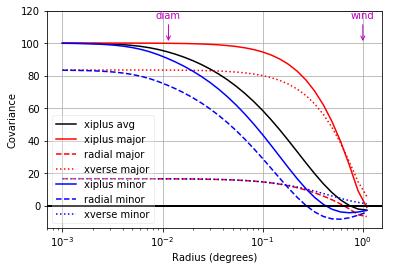

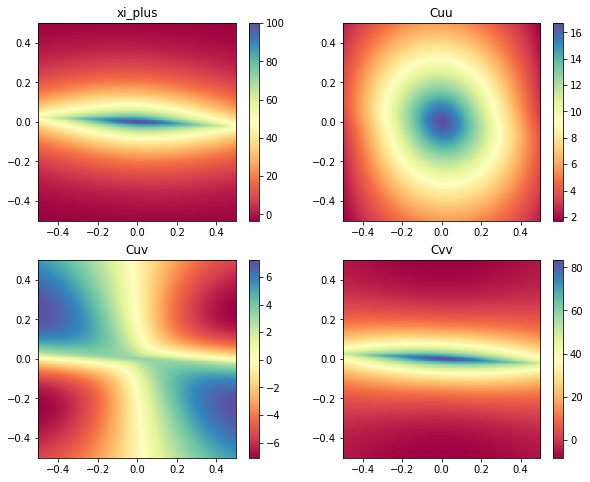

In [8]:
# Bigger wind
ttt.setWind((-1,0.05))
plotCuts(ttt,0.001,1.)
markScales(ttt)
plotCuv(ttt)